<a href="https://colab.research.google.com/github/MataiasCost/Python_UERJ/blob/main/Projeto1_IntroPythonUERJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 : Mudanças climáticas
___
#### Data de divulgação do projeto : 7/Outubro/2021
#### Prazo de entrega ***ESTENDIDO***: 28/Outubro/2021

___
Os modelos de mudança climática são muito complexos, devem levar em consideração radiação de corpo negro, termodinámica de gases, dinámica dos oceanos e fluctuações. Em 2021 os [ganhadores do Premio Nobel de Física](https://www.nobelprize.org/prizes/physics/2021/press-release/)  Klaus Hasselmann, Syukuro Manabe e Giorgio Parisi  foram laureados pela sua contribuição à modelagem computacional e teórica do clima terrestre. 


Uma forma simplista de começar entender a dinámica da temperatura frente a regulamentações ambientais (de gases de efeito estufa, por exemplo) e da retroalimentação do sistema climático global é a seguinte equação diferencial:


$\dfrac{dC}{dt} =\dfrac{1}{10} (C - 20)(22 - C)(C - 26) - k $


onde $C$ é a temperatura em graus Celsius no equador e $k$ é uma medida das regulamentações implementadas, onde $k$ positivo é mais regulamentação e $k$ negativo é "desregulamentação". [Fonte](https://scholarship.claremont.edu/cgi/viewcontent.cgi?article=1035&context=codee) 


## Parte 1 
***(4pt)***

Usando integração  numérica (o mêtodo da sua escolha) escreva um programa que resolva a equação diferencial  para um valor de $k$ e da temperatura inicial $C_0$ arbitrários. O resultado deve ser apresentado em forma de um gráfico da evolução da temperatura no equador em função do tempo para um intervalo de 50 anos.

Chame a sua função para fazer o gráfico para $C_0=20^{\circ} \, \mathrm{C}$ e alguns valores de $k$ (p.ex. Figura abaixo).

O programa **deve utilizar funções, encapsulamento e generalização** quando possível.


_Dica: Pode chamar e utilizar os módulos `math`, `matplotlib`, `numpy` e/ou `scipy`._



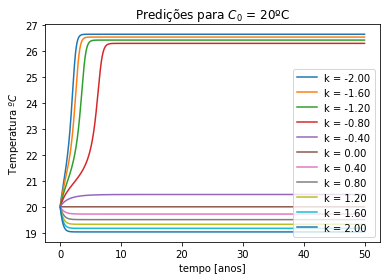

Bot: Bom dia, tarde ou noite. Esse programa tem como objetivo desenhar o grafico da temperatura ao longo dos anos. Por favor, responda as perguntas a seguir para que o programa funcione corretamente.
Bot: Uma dica: colocando 999 como resposta em qualquer uma das perguntas, o programa retornará o exemplo das professoras.
Quantos k's você quer testar? 999


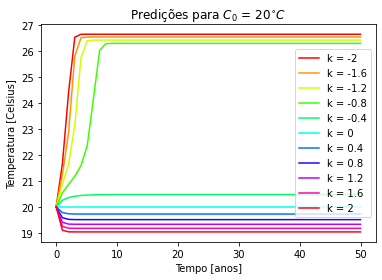

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import Image


# Descrição do funcionamento desse codigo!

#Descrição: Ele resolve a EDO da questão 1 do curso de Python
#Nota: O programa não é 100% a prova de falhas AINDA!


#Nota: Procurar versões mais simples de implementar!
# Função responsavel por eu não precisar criar uma lista gigante de cores
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

#Primeiro definimos a função DC, sendo ela
def modelo(temperatura,t,valores_k):
  dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - valores_k
  return dcdt


def adquirir_quantidade_de_ks_e_seus_valores():
  global flag
  global flag_exemplo_professora
  global valores_k
  while flag == False:
    try:
      n_k = int(input("Quantos k's você quer testar? "))
      flag = True
      if n_k == 999:
        flag_exemplo_professora = True;
        break
    except ValueError or IndentationError or SyntaxError:
      print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter, tentou hackiar o CERN (To de olho Gabriel, fica esperto @-@)  ")
      flag = False
  #Protegendo o codigo de pessoas que podem querer quebrar ele. ACHO que protegi contra tudo kkkkkk
  if n_k == 1:
    valor_k = float(input("Entre com o valor de k: "))
    valores_k.append(valor_k)
  elif n_k < 1:
    print("Eu vi o que você fez ai \(@o@)/ Tenta de novo parceiro mas dessa vez com 1 ou mais valores de k")
    while n_k < 1:
      try:
        n_k = int(input("Quantos k's você quer testar? "))
        if n_k == 999:
          flag_exemplo_professora = True;
        if n_k < 0:
          print("Por favor, escreve um número maior, ou igual, a 1...")
      except ValueError:
        print(" Talvez você não saiba português, então aqui vai: Oops!  That was no valid number.  Try again...")
  if n_k > 1:  
    for x in range(n_k):
      if  flag_exemplo_professora == True:
        valores_k = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
        break
      flag_2 = False
      while flag_2 == False:
        try:
          valor_k = float(input("Entre com os valores do k: "))
          flag_2 = True
          if valor_k == 999:
            flag_exemplo_professora = True;
        except ValueError or IndentationError or SyntaxError:
          print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter...Ta tentando hackiar o CERN de novo, Gabriel??  ")
          flag_2 = False 
      valores_k.append(valor_k)  

def adquirir_valor_da_temperatura():
  global flag_3
  global flag_exemplo_professora
  global temperatura
  while flag_3 == False:
    if flag_exemplo_professora == True:
      temperature = 20
      break
    try:
      temperatura = float(input("Entre com o valor da temperatura, em graus celsius, no equador:"))
      if temperatura < -273:
        print("Infelizmente o resultado do programa não deve representar a realidade. Mas pra consulta aqui está o resultado:")
      flag_3 = True
      if temperatura == 999:
        flag_exemplo_professora = True;
    except ValueError or IndentationError or SyntaxError:
      print("Oops! Você acabou digitando algo que não podia. Bom aqui vai uma lista do que você pode ter errado: Usou caracteres especiais ou letras, clicou enter...Gabriel eu juro que se for você...  ")
      flag_3 = False 
  if flag_exemplo_professora == True:
    valores_k = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
    temperatura = 20



def fazer_hist():
  cmap = get_cmap(len(valores_k))
  for i in range(len(valores_k)):
    #Resolvendo a EDO
    y = odeint(modelo,temperatura,t,args=(valores_k[i],))
    labels = 'k = '+ str(valores_k[i])
    plt.plot(t,y,label=labels,color = cmap(i))
  titulo = r"Predições para $C_{0}$ = $"+str(temperatura)+ r" ^{\circ}C$"
  plt.xlabel("Tempo [anos]")
  plt.ylabel("Temperatura [Celsius]")
  plt.title(titulo)
  plt.legend()
  plt.show()

######################################################################################################
# MAIN 
print("Bot: Bom dia, tarde ou noite. Esse programa tem como objetivo desenhar o grafico da temperatura ao longo dos anos. Por favor, responda as perguntas a seguir para que o programa funcione corretamente.")
print("Bot: Uma dica: colocando 999 como resposta em qualquer uma das perguntas, o programa retornará o exemplo das professoras.")
#determinando o tempo
t = np.linspace(0,50)     #50 anos de 1 em 1 ano 
flag_exemplo_professora = False # Se ela estiver verdadeira, vai gerar o modelo de exemplo da professora.Pode ser ativada em qualquer umas das etapas de preenchimento de valor, basta colocar 42, que é a resposta para a Grande Pergunta sobre a Vida, o Universo e Tudo o Mais
flag = False   # Flag que determina se o número de ks faz sentido
valores_k = []  # Lista com os valores dos k's
flag_3 = False  # Flag que determina se o valor da temperatura faz sentido
adquirir_quantidade_de_ks_e_seus_valores()    #Adquire a quantidade de k e seus valores
adquirir_valor_da_temperatura()               # Adquire o valor da temperatura em celsius.
fazer_hist()                                  #Faz os histogramas com as informações coletadas.


## Parte 2:
***(4pt)***


Modifique o programa anterior para ser um **módulo**.

Em um novo programa, chame o módulo para obter a solução da equação diferencial para um conjunto de valores variados de $k$ e $C_0$ em uma "_rede_" (ou matriz), isto quer dizer, percorrendo valores de  $k \in [k_{min},k_{max}]$ e $ C_0 \in [C_0^{min},C_0^{max}]$ em intervalos regulares.

A **temperatura de equilibrio** (ou de estabilização) ($T_{fin}$) é aquela que se mantem relativamente estável após um certo intervalo. Para determiná-la, escreva no seu programa um algoritmo que ache este valor e o tempo necessário para chegar nele (quantitativamente). 

Obtenha o valor da temperatura de equilibrio (asintótica) para cada ponto da configuração inicial $(k,C_0)$ e analise as soluções para as diferentes configurações, por exemplo gerando graficos que mostrem a temperatura final em função de $k$ para alguns valores de $C_0$ ou qualquer outra relação relevante (justifique). 

_Dica 1: o gráfico_ $T_{fin} \times k$ _é chamado de diagrama de bifurcação e pode ser usado para responder algumas perguntas da parte 3._

_Dica 2: pode ser usado o gráfico de dispersão `scatter` a opção `c=z` com `cmap` do matplotlib [site](https://matplotlib.org/stable/tutorials/colors/colormaps.html)._

```python
plt.scatter(x,y,c=z,cmap="rainbow")
```



 



In [1]:
#PRIMEIRA PARTE da PARTE 2: Modificar o programa anterior para ser um módulo.
#Nota: Essa é uma versão simplificada da apresentada no exercício 1.
#Foram retirados os metôdos de proteção e o sistema de input(), mas funciona perfeitamente.
%%writefile Parte_1.py
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



#Primeiro definimos a função DC, sendo ela
def modelo(temperatura,t,valores_k):
  dcdt = (1/10)*(temperatura - 20)*(22- temperatura)*(temperatura - 26) - round(valores_k,1)
  return dcdt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)





def adquirir_valores_e_fazer_plots(valores_k,temperatura,flag_quero_temp_equilibrio=False):
  #determinando o tempo
  t = np.linspace(0,50)     #5 anos de 1 em 1 ano
  #Resolvendo a EDO
  if isinstance(valores_k,np.ndarray):
    cmap = get_cmap(len(valores_k))
    for i in range(len(valores_k)):
      #Resolvendo a EDO
      y = odeint(modelo,temperatura,t,args=(round(valores_k[i],1),))
      flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
      if flag_equilibrio and flag_quero_temp_equilibrio:
        labels = 'k: ' + str(round(valores_k,1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
      else:
        labels = 'k = '+ str(round(valores_k[i],1))
      plt.plot(t,y,label=labels,color = cmap(i))
  else:
    y = odeint(modelo,temperatura,t,args=(round(valores_k,1),))
    flag_equilibrio,tempo_pro_equilibrio,valor_da_temperatura_de_equilibrio =  achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y)
    #print(flag_equilibrio)
    if flag_equilibrio and flag_quero_temp_equilibrio:
        labels = 'k: ' + str(round(valores_k,1)) + r';$T_{fin}$:' + str(valor_da_temperatura_de_equilibrio) +r'; Tempo:' + str(tempo_pro_equilibrio)
    else:
      labels = 'k = '+ str(round(valores_k,1))
    plt.plot(t,y,label=labels,color ='green')
  titulo = r"Predições para $C_{0}$ = $"+str(temperatura)+ r" ^{\circ}C$"
  plt.xlabel("Tempo [anos]")
  plt.ylabel("Temperatura [Celsius]")
  plt.title(titulo)
  plt.legend()
  plt.show()

#Esse algoritmo considera a temperatura de estabilidade aquela que apresentar 5 ou mais ocorrencias consecutivas e com precisão até a terceira casa decimal.

def achar_temperatura_equilibrio_e_tempo_pra_chegar_nela(y):      
  flag_chegamos_no_equilibrio = False
  valor_anterior = -999
  tempo_para_chegar_na_temperatura = -1
  numero_de_ocorrencias = 0
  for valor_temperatura in y:
    #print('valor anterior: ',round(float(valor_anterior),3))
    #print('valor temperatura: ',round(float(valor_temperatura),3))
    if round(float(valor_anterior),3) == round(float(valor_temperatura),3):
      numero_de_ocorrencias += 1
      valor_anterior = valor_temperatura
    elif valor_anterior != valor_temperatura:
      numero_de_ocorrencias = 0
      valor_anterior = valor_temperatura
    #print(numero_de_ocorrencias)
    if numero_de_ocorrencias > 5:            # optei por escolher o valor da temperatura se ele se mantiver por mais de 5 anos.
      flag_chegamos_no_equilibrio = True
      tempo_para_chegar_na_temperatura = list(y).index(valor_temperatura)
      break
    #print('-----------------')
  #print(flag_chegamos_no_equilibrio)  
  return flag_chegamos_no_equilibrio,tempo_para_chegar_na_temperatura, round(float(valor_temperatura),3)

  

Overwriting Parte_1.py


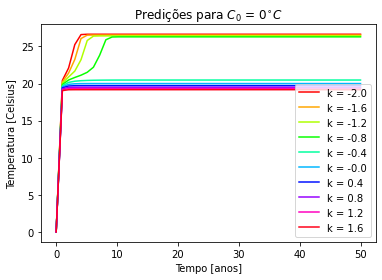

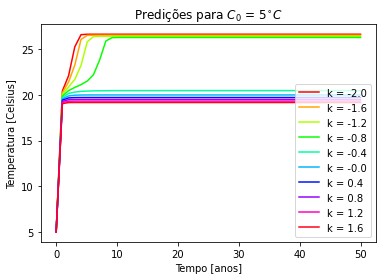

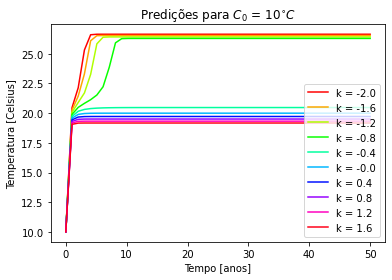

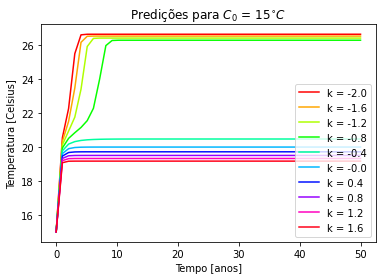

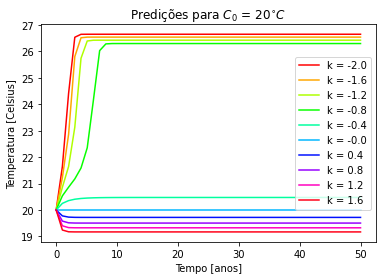

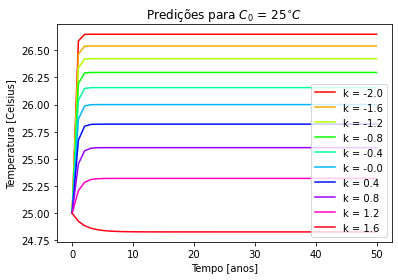

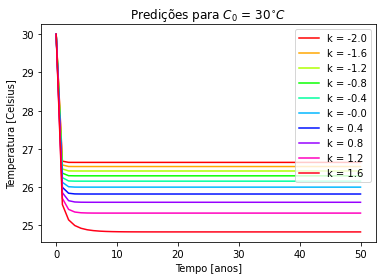

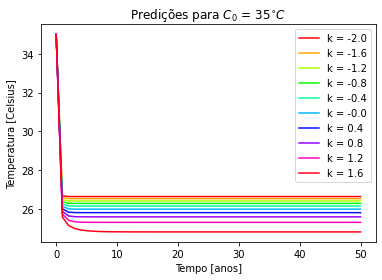

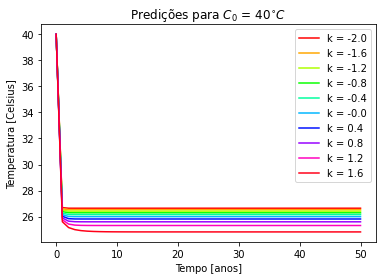

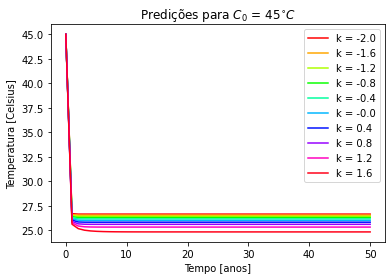

In [5]:
 #Primeira parte da PARTE 2:  Solução da equação diferencial para um conjunto de valores variados de k e C0 em uma "rede" (ou matriz)
 from Parte_1 import *               #Importanto todas os pacotes que o Parte_1 tem
 import Parte_1                      #Importando o modulo Parte_1

Lista_das_temperaturas = np.arange(0,50,5)                      # Declaração da lista de valores da temperatura, começando com 0 e chegando até 50, em intervalos de 50/10 graus
Lista_dos_valores_de_k = np.arange(-2,2,0.4)                    # Declaração da lista de valores de ks, começando com -3 e chegando até 3, em intervalos regulares de 6/20
for temperatura in Lista_das_temperaturas:
  Parte_1.adquirir_valores_e_fazer_plots(Lista_dos_valores_de_k,temperatura)
  #Versão de plots de TODAS as combinações de k e C separados, GERA MUITOS PLOTS!
  #Nota: Por favor, considere usar a versão de cima, ela compacta os diferentes ks para valores da temperatura.
  #for k in Lista_dos_valores_de_k:
  #  Parte_1.adquirir_valores_e_fazer_plots(k,temperatura)

In [4]:
x = 1.76574827312

labels = 'uepa'+str(x)

## Parte 3:

***(2pt)***


Responda as perguntas,  apresentando cálculos ou gráficos para justificar as suas respostas.

1. O que acontece com a temperatura de estabilização se a _desregularização_  $k$ (negativo) for menor que $\sim -0.6$ ?

1. O que acontece com a temperatura de estabilização se a _regularização_ $k$ (positivo) for maior que $\sim 1.8 $ ?

1. Se $k$ for mantido em 0, o que acontece com a temperatura final para um valor de temperatura inicial $C_0 = 22^{\circ} C$ ?  e se este valor flutuar em $0.1^{\circ} C$ para cima?

1. Modifique seu programa para simular a seguinte situação, começamos com uma temperatura de $21^{\circ}C$ e $k=-0.5$, depois de 5 anos a regulamentação e relaxada ainda mais, com $k=-0.6$.

   a) Qual a temperatura no equador no momento da transição de $k=-0.5$ a $k=-0.6$?

   b) Qual a tendência  da temperatura (ou seja, desce ou sobe) 5 anos após a mudança?

   c) Qual o valor mínimo de $k$ a partir desse momento (10 anos após o começo) para que a temperatura do equador não aumente nos próximos 50 anos?
